# Notebook for checking latency

In [1]:
# each actor gets there own latency dataframe to check the time of the run step
# concatenate frames together to get total latency for a given frame 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
gen_df = pd.read_pickle("../latency/generator_latency_20250513-170410.pkl")
processor_df = pd.read_pickle("../latency/processor_latency_20250513-170410.pkl")
viz_df = pd.read_pickle("../latency/visual_latency_20250513-170410.pkl")

In [36]:
gen_df

,frame number,latency
0,0,9822835
1,1,8223625
2,2,7062831
3,3,7008253
4,4,7324239
...,...,...
996,996,6687702
997,997,7056122
998,998,7047028
999,999,6889482


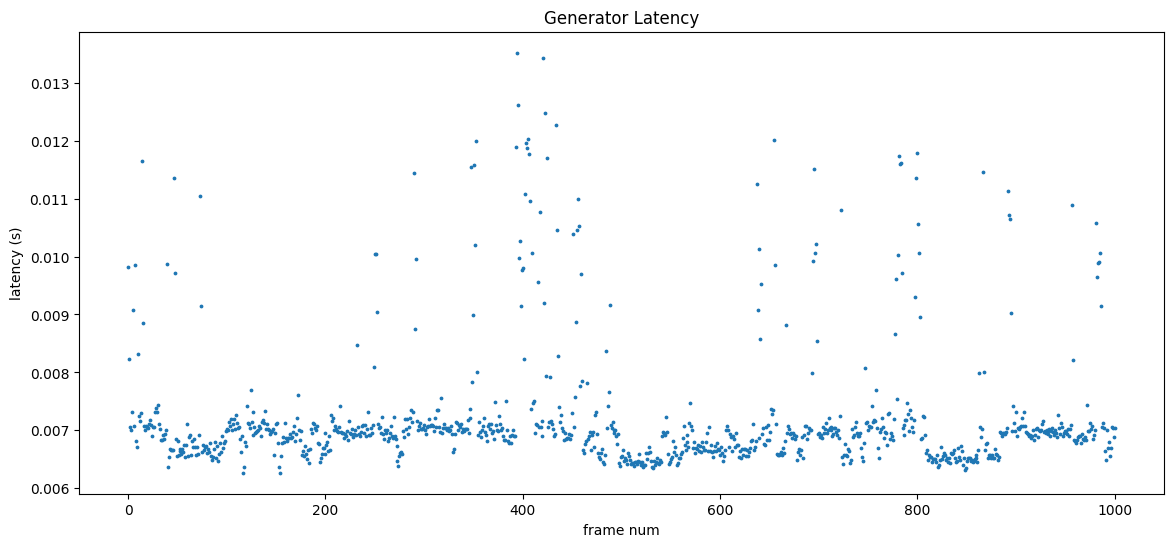

In [37]:
x = list(gen_df["frame number"])
y = [a/1e9 for a  in list(gen_df["latency"])]

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3)
plt.ylabel("latency (s)")
plt.xlabel("frame num")
plt.title("Generator Latency")
plt.show()

In [38]:
print(sum(y) / len(y))

0.00721490410989011


Text(0.5, 1.0, 'Generator Latency')

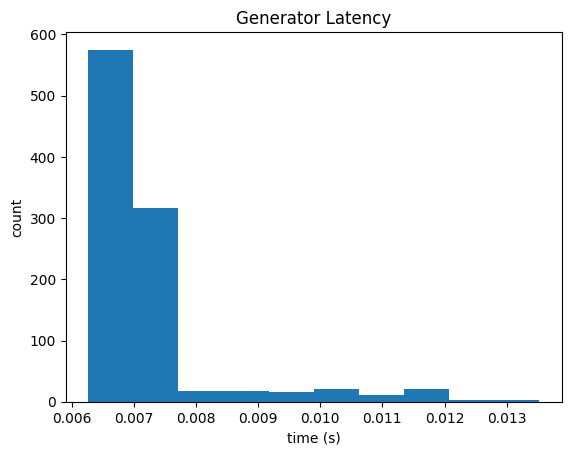

In [39]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (s)")
plt.title("Generator Latency")

In [40]:
processor_df

,frame number,latency
0,27,37808954
1,28,18885147
2,29,18181016
3,30,18927167
4,31,23796358
...,...,...
969,996,28072767
970,997,19392450
971,998,19841625
972,999,20925374


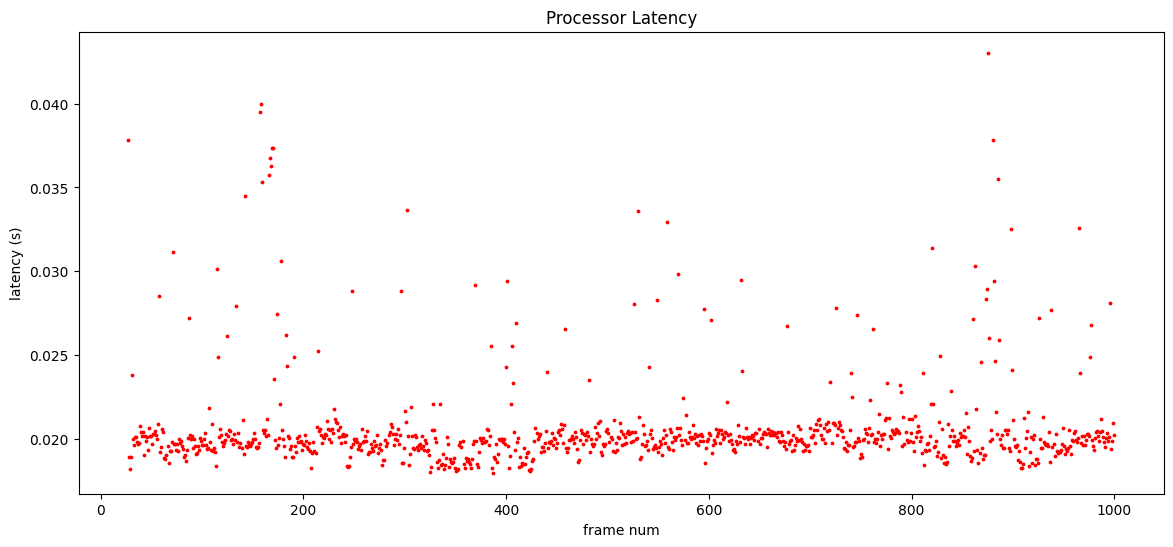

In [41]:
x = list(processor_df["frame number"])
y = [a/1e9 for a  in list(processor_df["latency"])]

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3, c="red")
plt.ylabel("latency (s)")
plt.xlabel("frame num")
plt.title("Processor Latency")
plt.show()

In [42]:
print(sum(y) / len(y))

0.020571069778234086


In [43]:
np.median(y)

np.float64(0.019927509500000003)

Text(0.5, 1.0, 'Processor Latency')

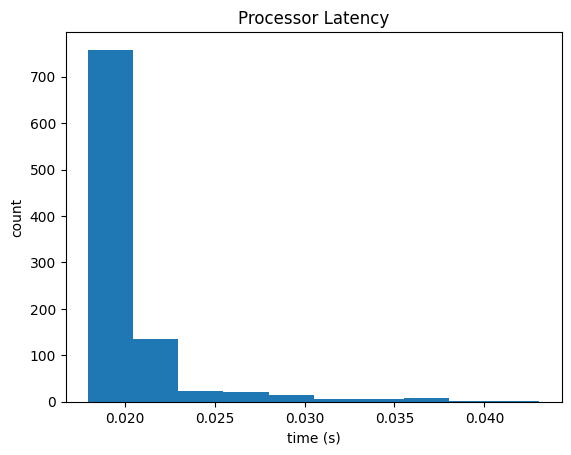

In [44]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (s)")
plt.title("Processor Latency")

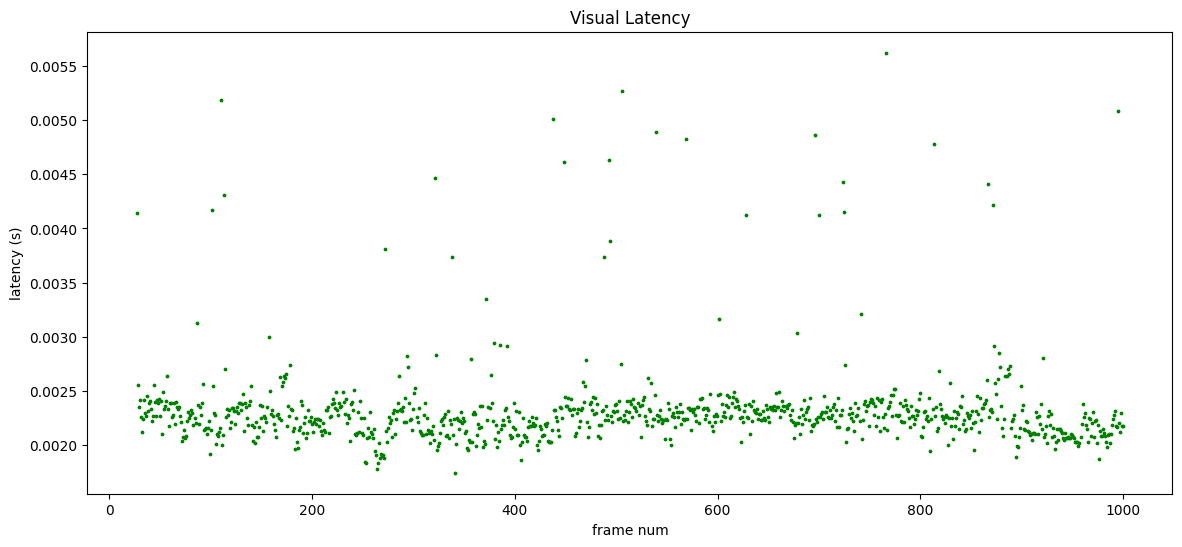

In [45]:
x = list(viz_df["frame number"])
y = [a/1e9 for a  in list(viz_df["latency"])]

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3, c="green")
plt.ylabel("latency (s)")
plt.xlabel("frame num")
plt.title("Visual Latency")
plt.show()

In [46]:
print(sum(y) / len(y))

0.0023183322669404517


In [47]:
np.median(y)

np.float64(0.002259314)

Text(0.5, 1.0, 'Visual Latency')

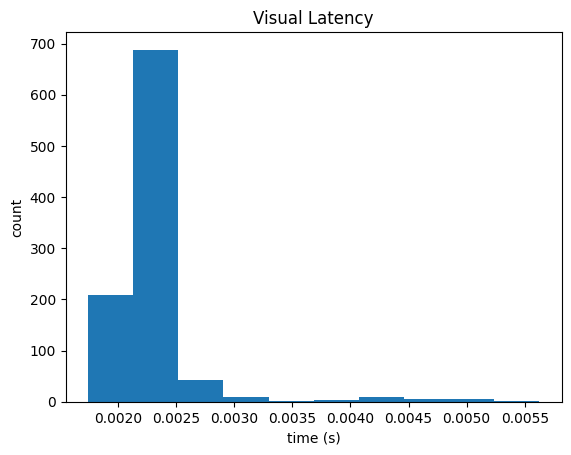

In [48]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (s)")
plt.title("Visual Latency")

## Total Latency

In [49]:
gen_y = [a/1e9 for a  in list(gen_df["latency"])][27:900]

In [50]:
proc_y = [a/1e9 for a  in list(processor_df["latency"])[27:900]]

In [51]:
viz_y =  [a/1e9 for a  in list(viz_df["latency"])[27:900]]

In [52]:
total_latency = [x + y + z for x, y, z in zip(gen_y, proc_y, viz_y)]

Text(0.5, 1.0, 'Total Latency')

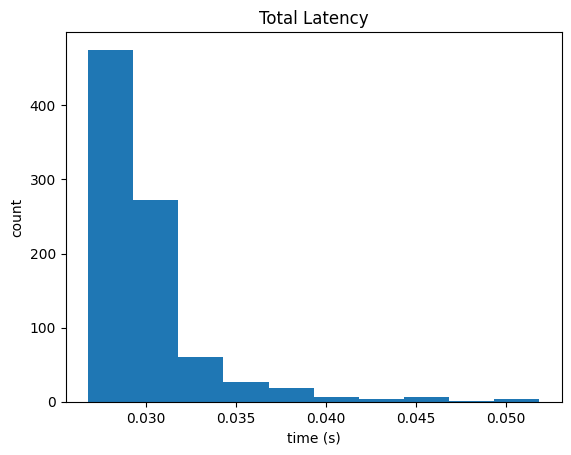

In [53]:
plt.hist(total_latency)
plt.ylabel("count")
plt.xlabel("time (s)")
plt.title("Total Latency")

In [54]:
sum(total_latency) / len(total_latency)

0.0301096594696449

In [56]:
np.median(total_latency)

np.float64(0.029225498)